In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("default")
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True

In [12]:
df=pd.read_csv('svm_regression_data.csv')
print(df.head())

          X          y
0  3.745401  13.748855
1  9.507143  35.739508
2  7.319939  28.205933
3  5.986585  21.524344
4  1.560186  11.192201


In [13]:
X=df['X']
y=df['y']

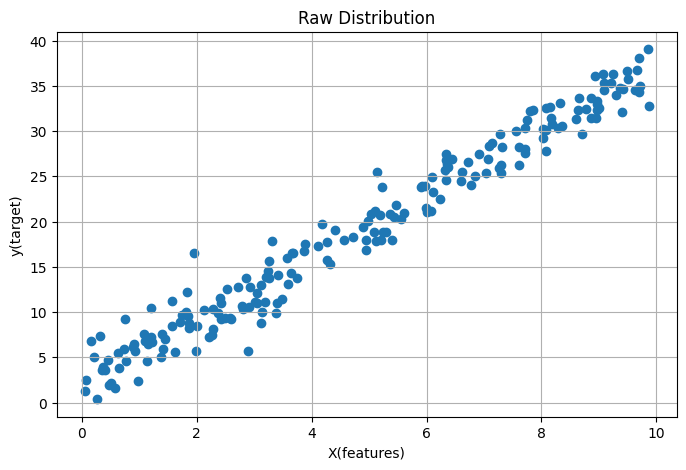

In [14]:
plt.scatter(X,y)
plt.xlabel('X(features)')
plt.ylabel('y(target)')
plt.title('Raw Distribution')
plt.show()

In [15]:
#train test split
indices = np.random.permutation(len(X))

split_index=int(0.8*len(X))

train_index=indices[:split_index]
test_index=indices[split_index:]

X_train=X[train_index]
Y_train=y[train_index]

X_test=X[test_index]
y_test=y[test_index]

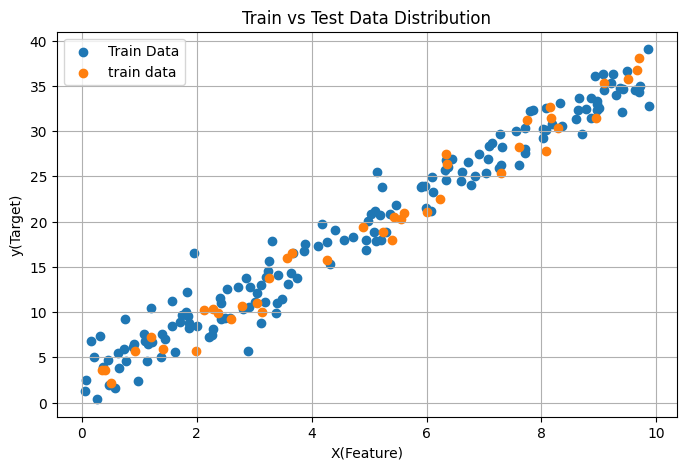

In [16]:
#graph of traion vs test scatter
plt.scatter(X_train,Y_train,label='Train Data')
plt.scatter(X_test,y_test,label='train data')
plt.xlabel('X(Feature)')
plt.ylabel('y(Target)')
plt.title("Train vs Test Data Distribution")
plt.legend()
plt.show()

In [17]:
X_mean=X_train.mean()
X_std=X_train.std()

x_train_Scaled=(X_train-X_mean)/X_std
X_test_scaled=(X_test-X_mean)/X_std

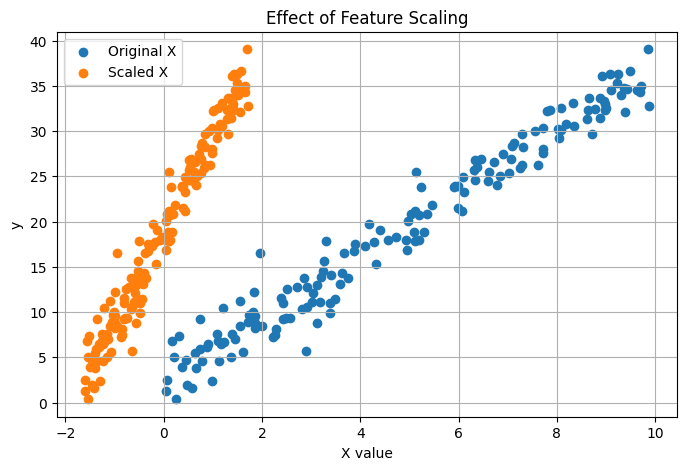

In [18]:
#before vs after scaling
plt.scatter(X_train, Y_train, label="Original X")
plt.scatter(x_train_Scaled, Y_train, label="Scaled X")

plt.xlabel("X value")
plt.ylabel("y")
plt.title("Effect of Feature Scaling")
plt.legend()
plt.show()

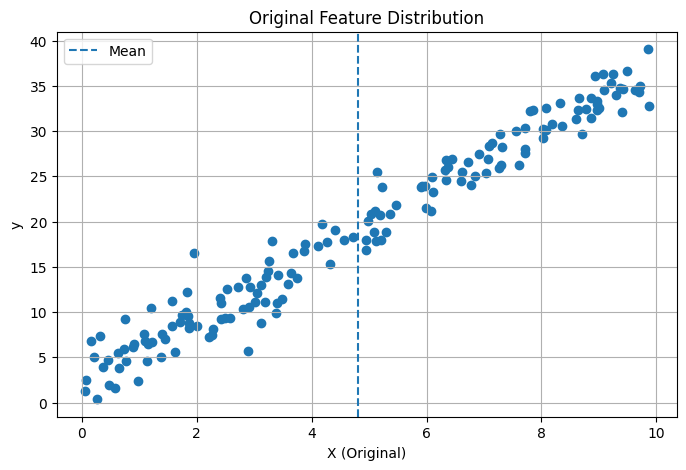

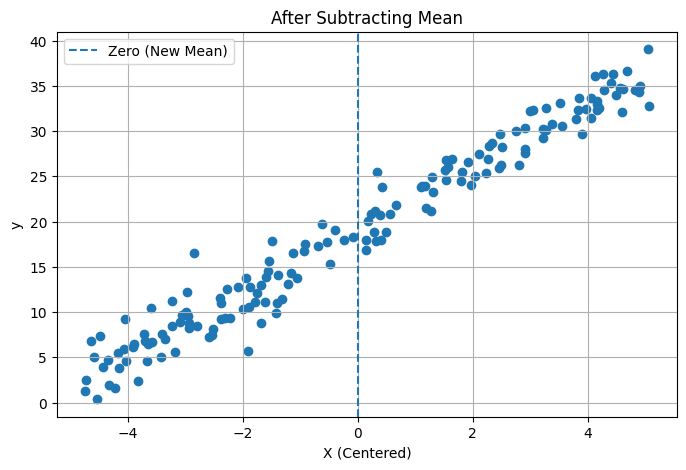

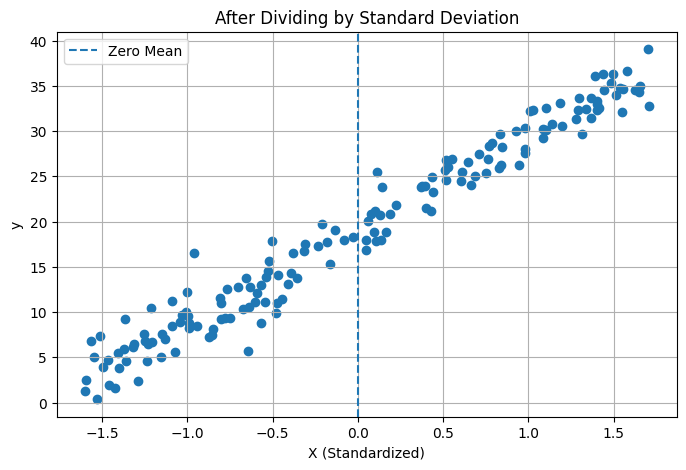

In [19]:
plt.scatter(X_train, Y_train)
plt.axvline(X_train.mean(), linestyle="--", label="Mean")
plt.xlabel("X (Original)")
plt.ylabel("y")
plt.title("Original Feature Distribution")
plt.legend()
plt.show()
X_centered = X_train - X_train.mean()

plt.scatter(X_centered, Y_train)
plt.axvline(0, linestyle="--", label="Zero (New Mean)")
plt.xlabel("X (Centered)")
plt.ylabel("y")
plt.title("After Subtracting Mean")
plt.legend()
plt.show()
X_standardized = (X_train - X_train.mean()) / X_train.std()

plt.scatter(X_standardized, Y_train)
plt.axvline(0, linestyle="--", label="Zero Mean")
plt.xlabel("X (Standardized)")
plt.ylabel("y")
plt.title("After Dividing by Standard Deviation")
plt.legend()
plt.show()

In [20]:
# We’ll pretend:“What if the model chose this line?”
# create a straight line manually
x_line = np.linspace(x_train_Scaled.min(), x_train_Scaled.max(), 100)


# choose any slope & intercept (fake model)
fake_slope = 2.0
fake_intercept = 0.0

y_line = fake_slope * x_line + fake_intercept

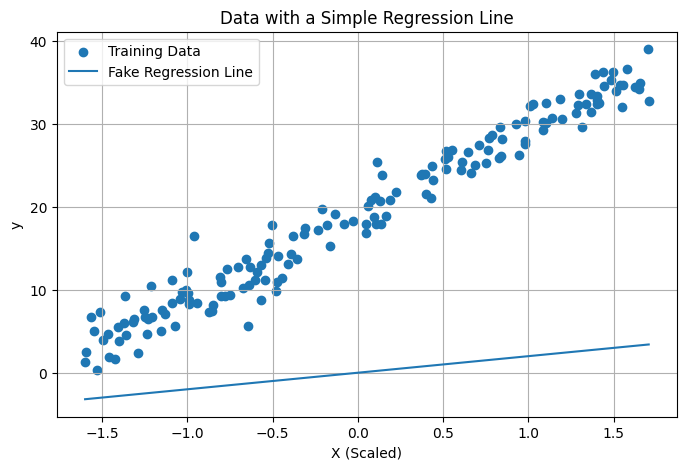

In [21]:
plt.scatter(x_train_Scaled, Y_train, label="Training Data")
plt.plot(x_line, y_line, label="Fake Regression Line")

plt.xlabel("X (Scaled)")
plt.ylabel("y")
plt.title("Data with a Simple Regression Line")
plt.legend()
plt.show()

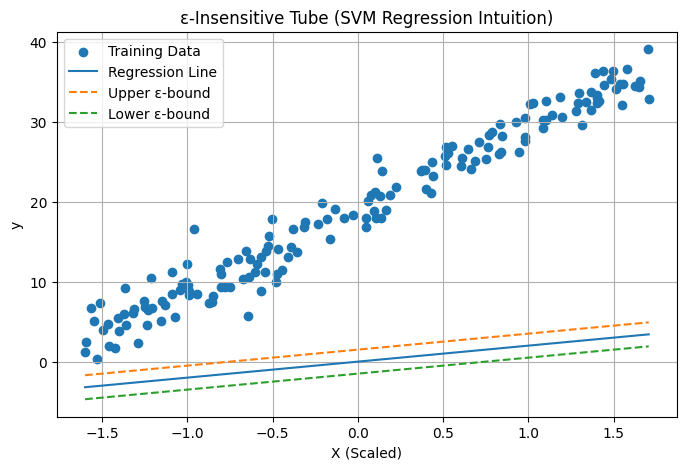

In [22]:
epsilon = 1.5
plt.scatter(x_train_Scaled, Y_train, label="Training Data")
plt.plot(x_line, y_line, label="Regression Line")

plt.plot(
    x_line,
    y_line + epsilon,
    linestyle="--",
    label="Upper ε-bound"
)

plt.plot(
    x_line,
    y_line - epsilon,
    linestyle="--",
    label="Lower ε-bound"
)

plt.xlabel("X (Scaled)")
plt.ylabel("y")
plt.title("ε-Insensitive Tube (SVM Regression Intuition)")
plt.legend()
plt.show()

In [23]:
# Points inside the tube → ignored 😌

# Points outside the tube → matter 😤

# Only a few points actually influence the model
# Those influential points are called
# ✨ support vectors ✨


In [24]:
# predicted y values from the fake line
y_pred_fake = fake_slope * x_train_Scaled + fake_intercept

# absolute error from the line
errors = np.abs(Y_train - y_pred_fake)
important_mask = errors > epsilon

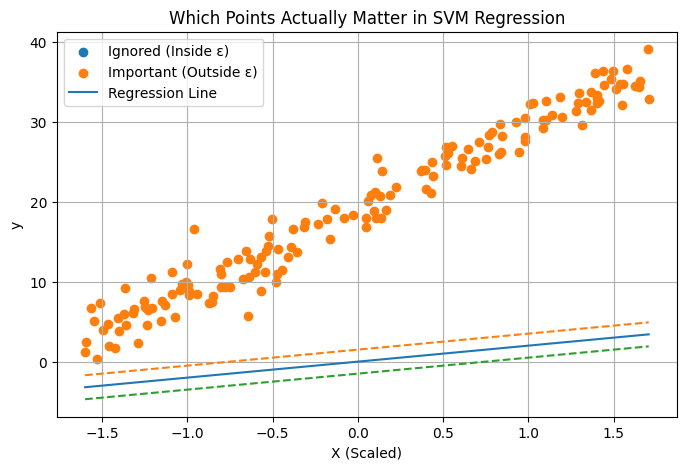

In [25]:
# ignored points (inside epsilon)
plt.scatter(
    x_train_Scaled[~important_mask],
    Y_train[~important_mask],
    label="Ignored (Inside ε)"
)

# important points (outside epsilon)
plt.scatter(
    x_train_Scaled[important_mask],
    Y_train[important_mask],
    label="Important (Outside ε)"
)

# regression line
plt.plot(x_line, y_line, label="Regression Line")

# epsilon bounds
plt.plot(x_line, y_line + epsilon, linestyle="--")
plt.plot(x_line, y_line - epsilon, linestyle="--")

plt.xlabel("X (Scaled)")
plt.ylabel("y")
plt.title("Which Points Actually Matter in SVM Regression")
plt.legend()
plt.show()

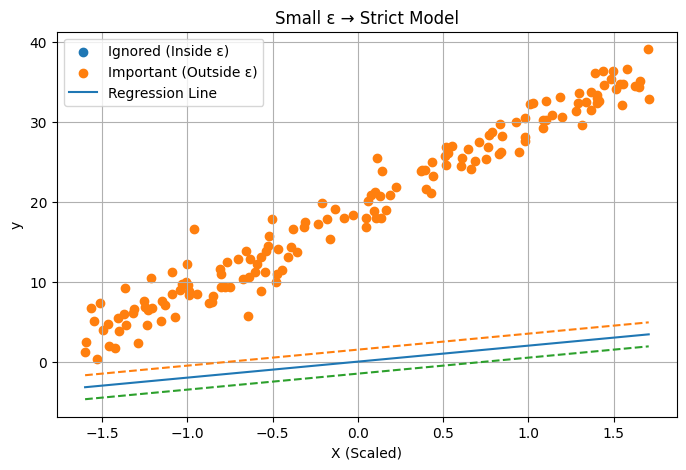

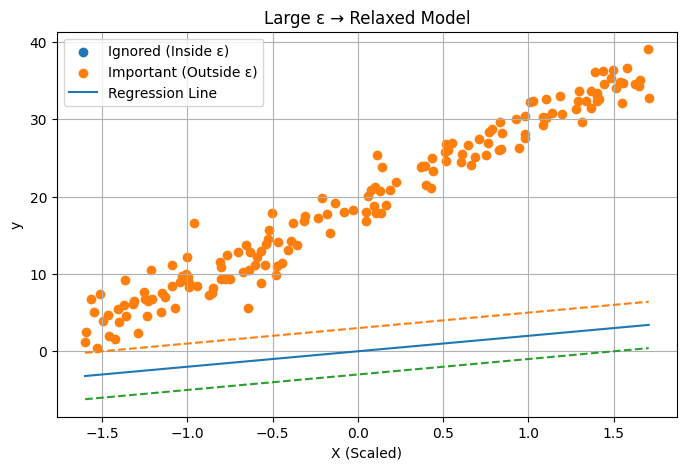

In [26]:
# 📍 Goal: SEE how strict vs relaxed SVM behaves
# 📍 Idea: small ε = strict, large ε = chill

epsilon = 1.5

y_pred_fake = fake_slope * x_train_Scaled + fake_intercept
errors = np.abs(Y_train - y_pred_fake)
important_mask = errors > epsilon

plt.scatter(
    x_train_Scaled[~important_mask],
    Y_train[~important_mask],
    label="Ignored (Inside ε)"
)

plt.scatter(
    x_train_Scaled[important_mask],
    Y_train[important_mask],
    label="Important (Outside ε)"
)

plt.plot(x_line, y_line, label="Regression Line")
plt.plot(x_line, y_line + epsilon, linestyle="--")
plt.plot(x_line, y_line - epsilon, linestyle="--")

plt.xlabel("X (Scaled)")
plt.ylabel("y")
plt.title("Small ε → Strict Model")
plt.legend()
plt.show()
epsilon = 3.0

y_pred_fake = fake_slope * x_train_Scaled + fake_intercept
errors = np.abs(Y_train - y_pred_fake)
important_mask = errors > epsilon

plt.scatter(
    x_train_Scaled[~important_mask],
    Y_train[~important_mask],
    label="Ignored (Inside ε)"
)

plt.scatter(
    x_train_Scaled[important_mask],
    Y_train[important_mask],
    label="Important (Outside ε)"
)

plt.plot(x_line, y_line, label="Regression Line")
plt.plot(x_line, y_line + epsilon, linestyle="--")
plt.plot(x_line, y_line - epsilon, linestyle="--")

plt.xlabel("X (Scaled)")
plt.ylabel("y")
plt.title("Large ε → Relaxed Model")
plt.legend()
plt.show()

In [27]:
"""📍 Goal: SEE how “strictness” changes when the model cares more or less
📍 Key idea:

C = how hard the model gets punished for mistakes
🧠 Before plotting — lock this idea

Think of C like a personality knob:

🔵 Small C → calm, forgiving, smooth

🔴 Large C → aggressive, reactive, bends to fit points

We’ll draw two fake models to show this."""

'📍 Goal: SEE how “strictness” changes when the model cares more or less\n📍 Key idea:\n\nC = how hard the model gets punished for mistakes\n🧠 Before plotting — lock this idea\n\nThink of C like a personality knob:\n\n🔵 Small C → calm, forgiving, smooth\n\n🔴 Large C → aggressive, reactive, bends to fit points\n\nWe’ll draw two fake models to show this.'

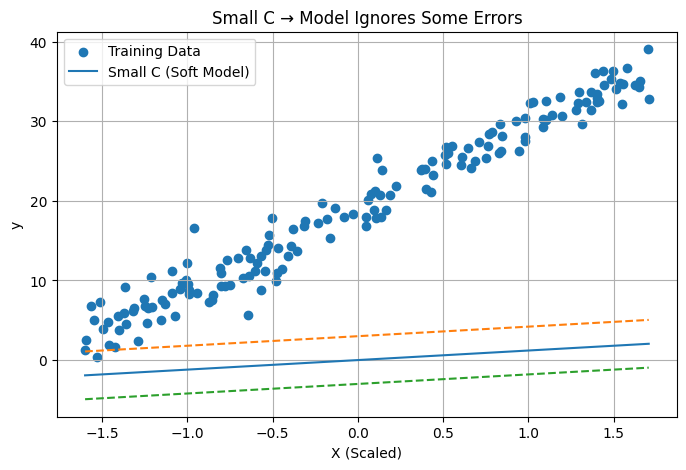

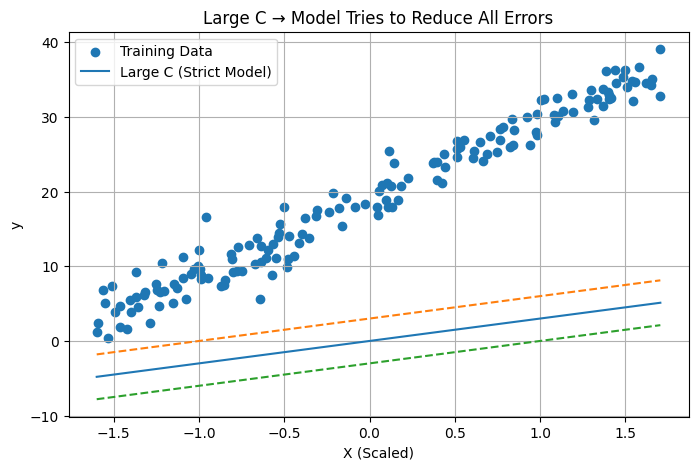

In [28]:
# small C → smoother line
soft_slope = 1.2
soft_intercept = 0.0

y_soft = soft_slope * x_line + soft_intercept

plt.scatter(x_train_Scaled, Y_train, label="Training Data")
plt.plot(x_line, y_soft, label="Small C (Soft Model)")

plt.plot(x_line, y_soft + epsilon, linestyle="--")
plt.plot(x_line, y_soft - epsilon, linestyle="--")

plt.xlabel("X (Scaled)")
plt.ylabel("y")
plt.title("Small C → Model Ignores Some Errors")
plt.legend()
plt.show()
# large C → aggressive fit
hard_slope = 3.0
hard_intercept = 0.0

y_hard = hard_slope * x_line + hard_intercept

plt.scatter(x_train_Scaled, Y_train, label="Training Data")
plt.plot(x_line, y_hard, label="Large C (Strict Model)")

plt.plot(x_line, y_hard + epsilon, linestyle="--")
plt.plot(x_line, y_hard - epsilon, linestyle="--")

plt.xlabel("X (Scaled)")
plt.ylabel("y")
plt.title("Large C → Model Tries to Reduce All Errors")
plt.legend()
plt.show()